In [1]:

%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split


# Partial Dependence Plots

In [2]:
bike_day_df_raws = pd.read_csv('./bsd/day.csv')
bike_day_df_raws.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
# Keep only some features
df = bike_day_df_raws[["temp", "hum", "windspeed", "cnt"]]

# Train test split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :3], # train for first 3 variables
                                                    df.iloc[:, 3], # test is the last variable
                                                    test_size=0.2, # 20% for testing
                                                    random_state = 123)

# Fit model by default
model = GradientBoostingRegressor(random_state = 123)
model.fit(X_train, y_train)

# Evaluate model using R squared
score = model.score(X_test, y_test)
score

/Users/lucianosanchez/dataenv3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lucianosanchez/dataenv3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lucianosanchez/dataenv3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lucianosanchez/dataenv3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be rem

0.4521661939298667

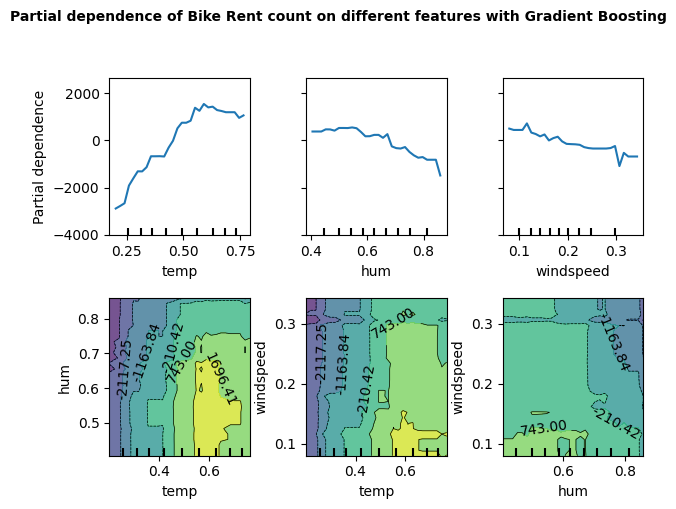

In [4]:
# Create the partial dependence display
pdp = PartialDependenceDisplay.from_estimator(model, 
                                              X_train, 
                                              features = ["temp", "hum", "windspeed", 
                                                          ("temp", "hum"), ("temp", "windspeed"), ("hum", "windspeed")], 
                                              #kind="both", 
                                              grid_resolution=30)

# Adjust the subplots spacing
pdp.figure_.subplots_adjust(wspace=0.4, hspace=0.4)

# Set the suptitle
plt.suptitle("Partial dependence of Bike Rent count on different features with Gradient Boosting", y=1.05, fontsize=10, fontweight='bold')

# Tighten the layout
plt.tight_layout()

In [8]:
# ! pip install pycebox

In [5]:
X_test

temp       hum  windspeed
488  0.560000  0.768333   0.133696
421  0.279167  0.410000   0.205229
91   0.315000  0.653750   0.197146
300  0.330833  0.585833   0.229479
177  0.682500  0.658333   0.107588
..        ...       ...        ...
631  0.529167  0.467083   0.223258
548  0.781667  0.447083   0.195267
439  0.557500  0.579583   0.149883
449  0.437500  0.880833   0.220775
124  0.459167  0.444167   0.295392

[147 rows x 3 columns]

In [9]:
from pycebox.ice import ice, ice_plot
ice_df = ice(X_test, 'temp', model.predict)


/Users/lucianosanchez/dataenv3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


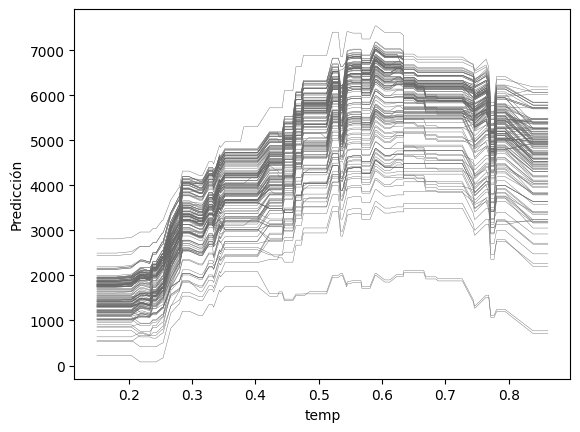

In [10]:
ice_plot(ice_df,c='dimgray', linewidth=0.3)
plt.ylabel('Predicción')
plt.xlabel('temp');

# LIME para clasificación de imágenes

In [12]:
# ! pip install scikit-image

In [18]:
import os
from keras.applications import inception_v3 as inc_net
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import skimage

In [21]:
# ! pip install lime

In [22]:
import lime
from lime import lime_image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing import image
import numpy as np

In [23]:
# Load and preprocess the image
image_path = './bsd/Dog_cat_1.png'  
# image_path = './bsd/Dog_cat_2.jpg'  
img = image.load_img(image_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

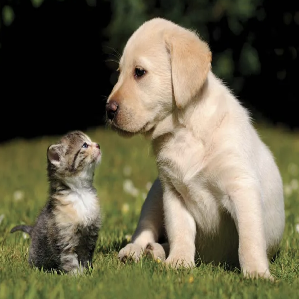

In [24]:
img

In [25]:
# Clasificador de imágenes preentrenado

inet_model = InceptionV3()


96112376/96112376 [==============================] - 13s 0us/step


In [26]:
def load_imagenet_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip() for line in f.readlines()]
    return labels

# Example usage
file_path = './bsd/imagenet1000_clsidx_to_labels.txt'
imagenet_labels = load_imagenet_labels(file_path)

In [27]:
# Función que toma una imagen y produce las probabilidades de que pertenezca a cada clase

explainer = lime_image.LimeImageExplainer()
def predict_fn(images):
    return inet_model.predict(images)

In [28]:
# Se le pasa una imagen, el color que se le pone a los pixeles cuando se ocultan, y el número de muestras
# perturbadas que se generan para evaluar cómo cambia el clasificador cuando se ocultan puntos

explanation = explainer.explain_instance(x[0], 
                                         predict_fn, 
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=2000)

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


In [29]:
[imagenet_labels[i] for i in explanation.top_labels]

["208: 'Labrador retriever',",
 "207: 'golden retriever',",
 "216: 'clumber, clumber spaniel',",
 "215: 'Brittany spaniel',",
 "852: 'tennis ball',"]

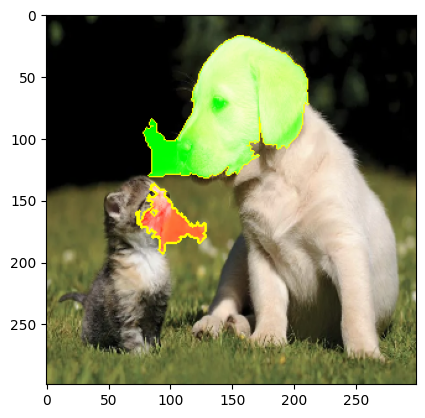

In [30]:
# Muestra las regiones que más contribuyen a la primera predicción

from skimage.segmentation import mark_boundaries

# Display the explanation using matplotlib
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False, 
                                            num_features=5, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

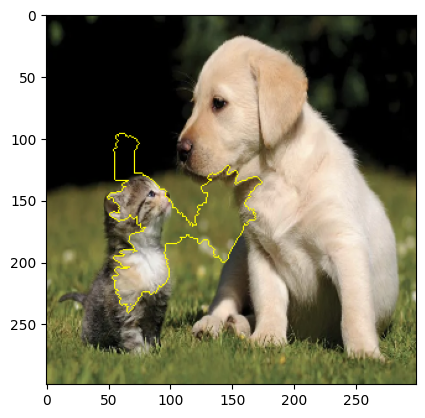

In [31]:
# Muestra las regiones que más se oponen a la primera predicción

from skimage.segmentation import mark_boundaries

# Display the explanation using matplotlib
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=False,
                                            negative_only=True, 
                                            num_features=5, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

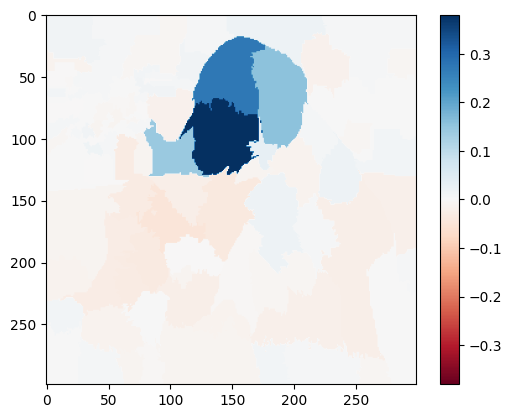

In [32]:
ind = explanation.top_labels[0]

dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.imshow(heatmap, cmap='RdBu', vmin= -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [33]:
X_train.columns.values.tolist()

['temp', 'hum', 'windspeed']

# Lime para datos tabulares

In [34]:

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime import lime_tabular

# Cargar el conjunto de datos Iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Entrenar un clasificador de bosque aleatorio
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train.values, y_train)

# Crear un explainer de LIME para datos tabulares
explainer = lime_tabular.LimeTabularExplainer(X_train.values, 
                                              feature_names=X_train.columns, 
                                              class_names=data.target_names, 
                                              mode='classification')

# Seleccionar una instancia para explicar
i = 1

# Explicar la instancia
exp = explainer.explain_instance(X_test.iloc[i].values, clf.predict_proba, num_features=4, labels=[0,1,2])




In [35]:
print("Predicción del modelo para la instancia:", data.target_names[clf.predict([X_test.iloc[i].values])[0]])

Predicción del modelo para la instancia: setosa


In [36]:
clf.predict_proba(X_test.iloc[i].values.reshape(1, -1))

array([[0.95, 0.05, 0.  ]])

In [37]:
# Mostrar la explicación
exp.show_in_notebook(show_table=True)

In [38]:
X_test.iloc[i]

sepal length (cm)    5.7
sepal width (cm)     3.8
petal length (cm)    1.7
petal width (cm)     0.3
Name: 18, dtype: float64

In [39]:
exp.as_list()

[('1.60 < petal length (cm) <= 4.30', 0.26294629691836985),
 ('petal width (cm) <= 0.30', -0.20119461419217463),
 ('5.10 < sepal length (cm) <= 5.80', 0.04017846205233874),
 ('sepal width (cm) > 3.30', 0.009873484332565938)]

# SHAP

In [42]:
# ! pip install shap

In [43]:
import shap

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.iloc[i].values, feature_names=data.feature_names)


In [44]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][i], X_test.iloc[i].values, feature_names=data.feature_names)

In [45]:
shap.initjs()
shap.force_plot(explainer.expected_value[2], shap_values[2][i], X_test.iloc[i].values, feature_names=data.feature_names)

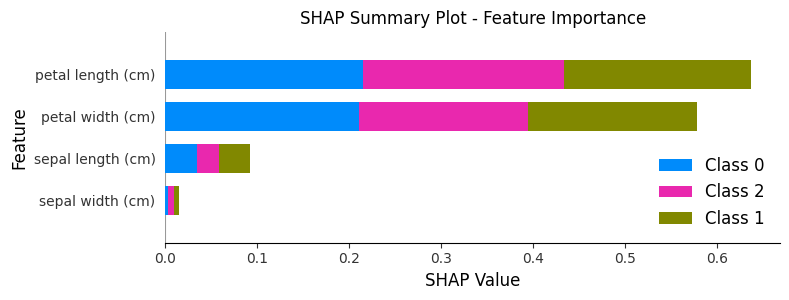

In [46]:
# Create a summary plot with the bar plot type
shap.summary_plot(shap_values, X_train, plot_type='bar', show=False)

# Customize the plot appearance
plt.title("SHAP Summary Plot - Feature Importance")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [47]:
explainer_a = shap.Explainer(clf)
shap_values_cat = explainer_a(X_test)

In [48]:
shap_values_cat.shape

(38, 4, 3)

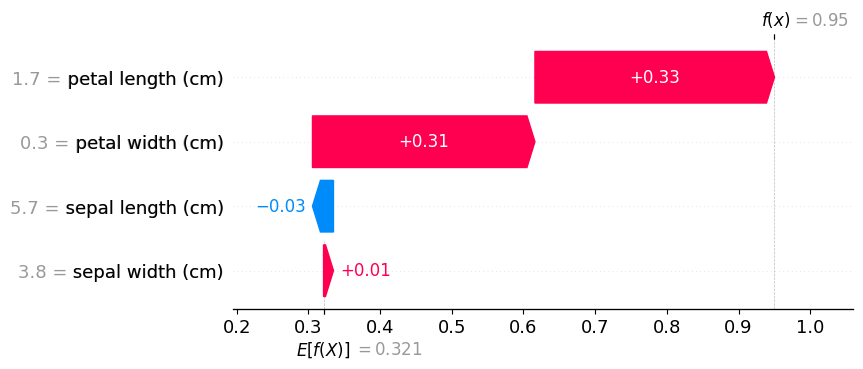

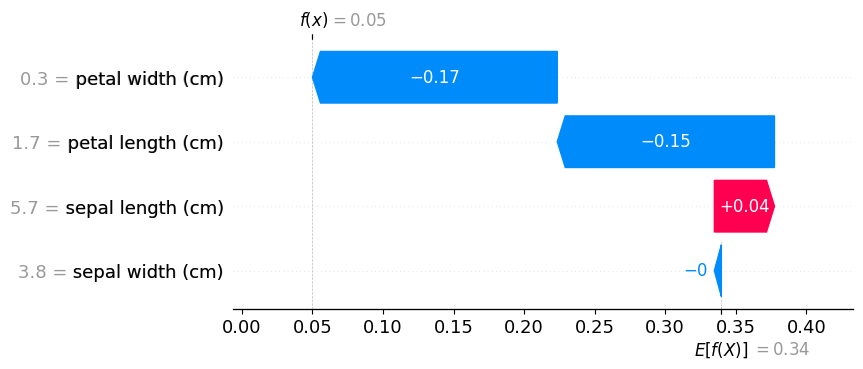

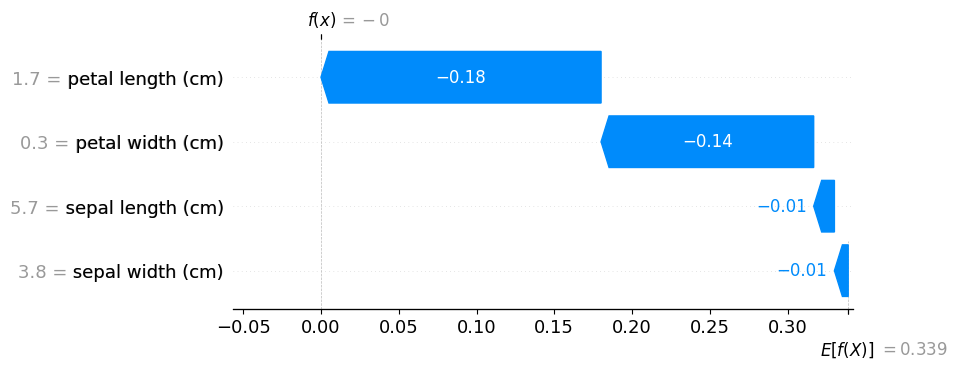

In [49]:
shap.plots.waterfall(shap_values_cat[i,:,0])
shap.plots.waterfall(shap_values_cat[i,:,1])
shap.plots.waterfall(shap_values_cat[i,:,2])

In [50]:
# # Cargar el conjunto de datos
# iris = load_iris()
# X = iris.data
# y = iris.target

# # Dividir los datos
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Entrenar un modelo de bosque aleatorio
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Usar SHAP para explicar las predicciones
# explainer = shap.TreeExplainer(model)
# shap_values = explainer.shap_values(X_test)

# # Visualizar la contribución de las características para una instancia específica (i)
# shap.initjs()  # necesario para visualización en Jupyter
# shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test[i], feature_names=iris.feature_names)

In [51]:
data = pd.read_csv('./bsd/breast-cancer-wisconsin.data', header=None)
data.columns=['Id number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data2 = data.apply(pd.to_numeric, errors='coerce') #Convert argument to numeric type and invalid parsing is set as NaN
data = data2.dropna() #Rewrrite previous data entry with new complete data 

#Patient Number is not required
del data['Id number']

# Display the first few records
data.head()

Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2                3                1        1      2  
3                3                7        1      2  
4                3                1        1      2

In [52]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :9], # train for first 3 variables
                                                    data.iloc[:, 9], # test is the last variable
                                                    test_size=0.2, # 20% for testing
                                                    random_state = 123)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
print(f"Score: {clf.score(X_test, y_test)}")

Score: 0.9781021897810219


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_sparse is deprecated and will be removed in a future version. Check `

In [53]:
# ! pip install shap
# ! pip install --upgrade numba

In [54]:

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

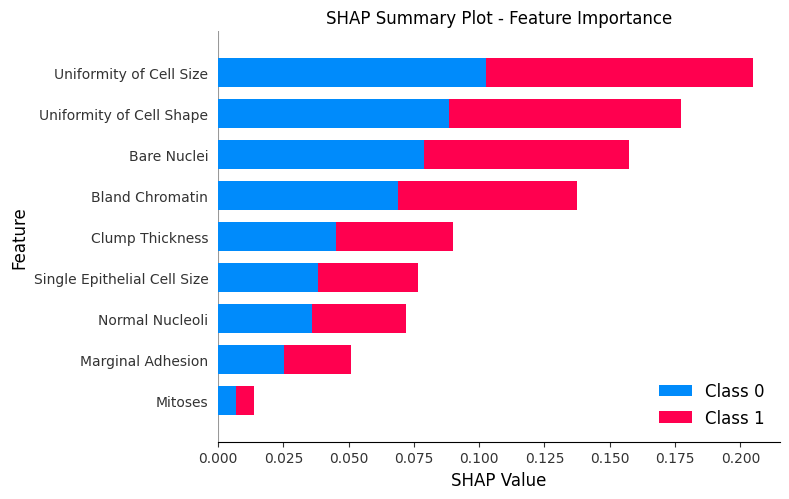

In [55]:
# Create a summary plot with the bar plot type
shap.summary_plot(shap_values, X_train, plot_type='bar', show=False)

# Customize the plot appearance
plt.title("SHAP Summary Plot - Feature Importance")
plt.xlabel("SHAP Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [56]:
explainer.expected_value[0]

0.6503846153846157

In [57]:
shap.initjs()
instancia = 1
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_train.iloc[instancia], figsize=10)

In [58]:
explainer_2 = shap.Explainer(clf)
shap_values_cat = explainer_2(X_train)

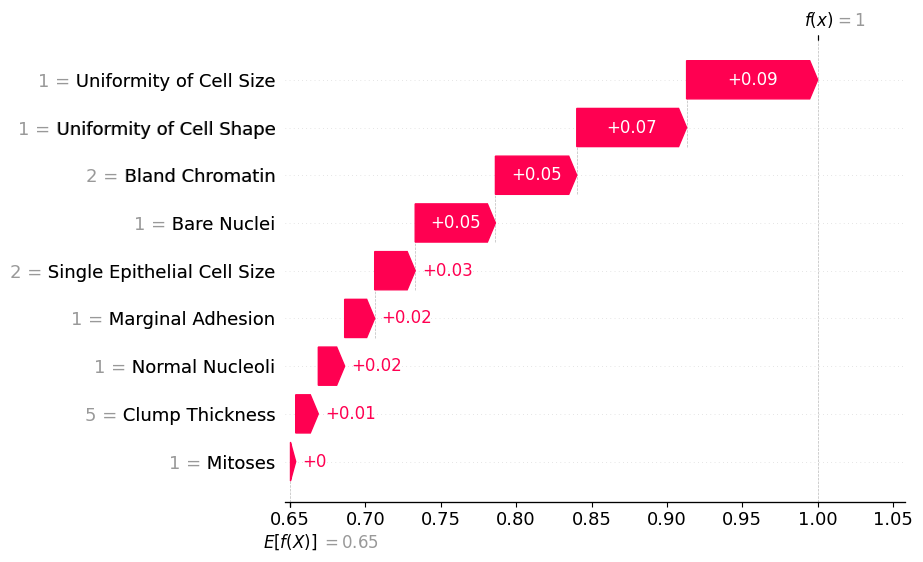

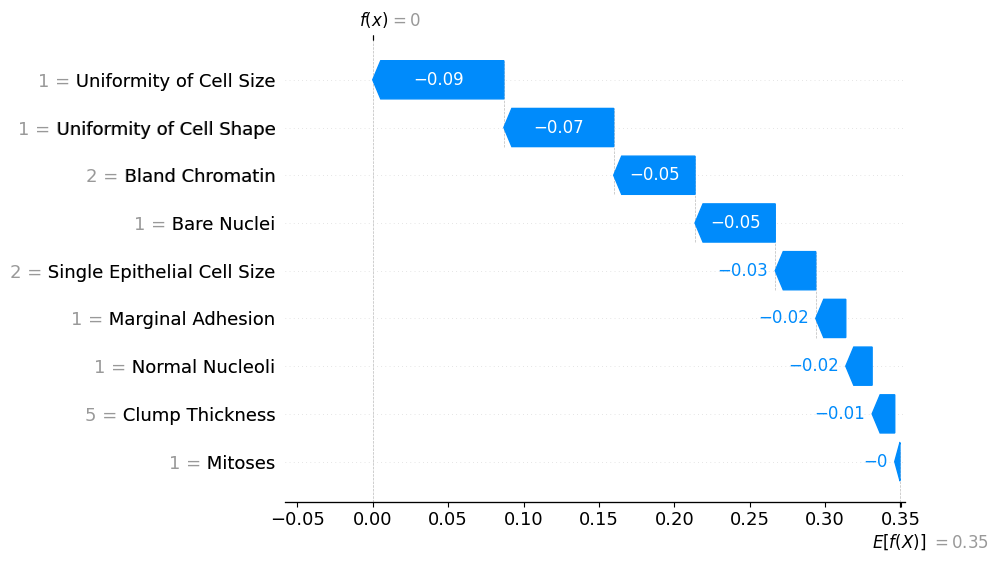

In [59]:
shap.plots.waterfall(shap_values_cat[0,:,0])
shap.plots.waterfall(shap_values_cat[0,:,1])